<a href="https://colab.research.google.com/github/RenanNB360/PyTorch/blob/main/Classifica%C3%A7%C3%A3o_d%C3%ADgitos_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importações

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'2.0.1+cu118'

# Etapa 2: Base de dados

In [ ]:
torch.manual_seed(123)

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train = datasets.MNIST(root = '.', train = True, download= True, transform = transform)
test = datasets.MNIST(root = '.', train = False, download= True, transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 125643577.99it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85850952.39it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 61728637.83it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22281320.20it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
test.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
train.data.shape, test.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
train.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 128)
test_loader = torch.utils.data.DataLoader(test, batch_size = 128)

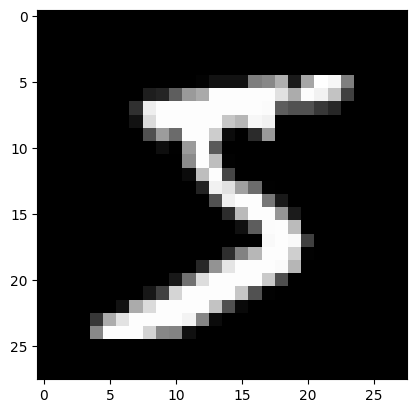

In [ ]:
imagem = next(iter(train_loader))[0][0].view(28, 28) # (1, 1, 28, 28)
plt.imshow(imagem, cmap = 'gray');

In [ ]:
imagem.shape

torch.Size([28, 28])

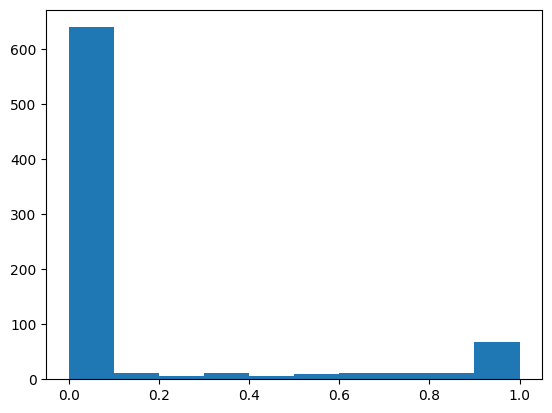

In [ ]:
plt.hist(imagem.view(-1));

# Etapa 3: Construção do modelo

In [ ]:
class classificador(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=(3,3))
    self.conv2 = nn.Conv2d(32, 32, (3, 3))
    self.activation = nn.ReLU()
    self.bnorm = nn.BatchNorm2d(num_features=32)
    self.pool = nn.MaxPool2d(kernel_size=(2,2))
    self.flatten = nn.Flatten()

    # 800 -> 128
    # output = (input - filter + 1) / stride
    self.linear1 = nn.Linear(in_features=32 * 5 * 5, out_features=128)
    self.linear2 = nn.Linear(128, 128)
    self.output = nn.Linear(128, 10)
    self.dropout = nn.Dropout(p = 0.2)

  def forward(self, X):
    X = self.pool(self.bnorm(self.activation(self.conv1(X))))
    X = self.pool(self.bnorm(self.activation(self.conv2(X))))
    X = self.flatten(X)

    X = self.dropout(self.activation(self.linear1(X)))
    X = self.dropout(self.activation(self.linear2(X)))
    X = self.output(X)

    return X

In [ ]:
net = classificador()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

# Treinamento do modelo

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [ ]:
net.to(device)

classificador(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (bnorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=800, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
def training_loop(loader, epoch):
  running_loss = 0.
  running_accuracy = 0.

  for i, data in enumerate(loader):
    inputs, labels = data

    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = net(inputs)

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    ps = F.softmax(outputs)
    top_p, top_class = ps.topk(k = 1, dim = 1)
    equals = top_class == labels.view(*top_class.shape)

    accuracy = torch.mean(equals.type(torch.float))
    running_accuracy += accuracy

    print(f'\rÉpoca: {(epoch + 1):3d} - Loop {(i + 1):3d} de {(len(loader)):3d}: perda {loss:03.2f} - precisão {accuracy:03.2f}', end = '\r')

  print(f'Época {(epoch + 1):3d} FINALIZADA: perda {(running_loss/len(loader)):.5f} - precisão {(running_accuracy/len(loader)):.5f}')

In [ ]:
for epoch in range(5):
  print('Treinando...')
  training_loop(train_loader, epoch)
  net.eval()
  print('Validando...')
  training_loop(test_loader, epoch)
  net.train()

Treinando...


<ipython-input-27-fd255b2284f8>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ps = F.softmax(outputs)


Época   1 FINALIZADA: perda 0.16281 - precisão 0.95171
Validando...
Época   1 FINALIZADA: perda 0.10315 - precisão 0.96746
Treinando...
Época   2 FINALIZADA: perda 0.05048 - precisão 0.98524
Validando...
Época   2 FINALIZADA: perda 0.05491 - precisão 0.98388
Treinando...
Época   3 FINALIZADA: perda 0.03760 - precisão 0.98895
Validando...
Época   3 FINALIZADA: perda 0.03632 - precisão 0.98932
Treinando...
Época   4 FINALIZADA: perda 0.02966 - precisão 0.99118
Validando...
Época   4 FINALIZADA: perda 0.03556 - precisão 0.98892
Treinando...
Época   5 FINALIZADA: perda 0.02544 - precisão 0.99210
Validando...
Época   5 FINALIZADA: perda 0.02118 - precisão 0.99318


# Etapa 5: Avaliação do modelo

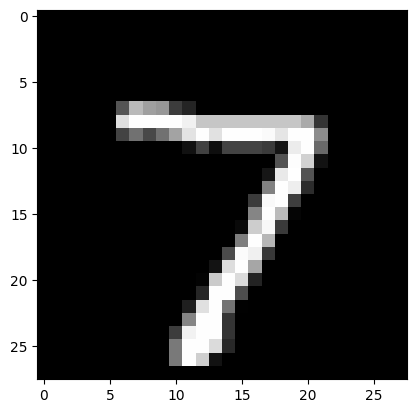

In [ ]:
imagem = next(iter(test_loader))[0][0].view(28, 28)
plt.imshow(imagem, cmap = 'gray');

In [ ]:
imagem.shape

torch.Size([28, 28])

In [ ]:
imagem = imagem.view(1, 1, 28, 28)
imagem.shape

torch.Size([1, 1, 28, 28])

In [ ]:
net.eval()
imagem = imagem.to(device)

In [ ]:
previsao = net.forward(imagem)
previsao

tensor([[-3.9755, -1.4847, -2.2548, -1.2328, -1.1195, -4.7827, -8.4755,  9.8319,
         -5.4399, -0.4599]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
previsao = F.softmax(previsao)

<ipython-input-44-4836b3525bc1>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  previsao = F.softmax(previsao)


In [ ]:
previsao

tensor([[1.0080e-06, 1.2168e-05, 5.6333e-06, 1.5653e-05, 1.7532e-05, 4.4970e-07,
         1.1198e-08, 9.9991e-01, 2.3306e-07, 3.3908e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [ ]:
previsao = previsao.cpu().detach().numpy()
previsao

array([[1.0080441e-06, 1.2167667e-05, 5.6333029e-06, 1.5653050e-05,
        1.7531871e-05, 4.4970059e-07, 1.1197941e-08, 9.9991345e-01,
        2.3306454e-07, 3.3907680e-05]], dtype=float32)

In [ ]:
resultado = np.argmax(previsao)
resultado

7